<a href="https://colab.research.google.com/github/mioyn/AdvDataProg/blob/main/ML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1.Loading and describing data

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/amiruluzair/Air-Quality-Prediction/main/updated_pollution_dataset.csv"
df = pd.read_csv(url)

In [ ]:
# Check for missing values
print(df.isnull().sum())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [ ]:
# Rename columns for simplicity
columns = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
           'Proximity_to_Industrial_Areas', 'Population_Density', 'Air_Quality']
df.columns = columns

# Initial inspection
print("Shape of dataset:", df.shape)
df.head(10)

Shape of dataset: (5000, 10)


Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   
5         39.4      96.6   14.6  35.5  42.9  17.9  1.82   
6         41.7      82.5    1.7  15.8  31.1  12.7  1.80   
7         31.0      59.6    5.0  16.8  24.2  13.6  1.38   
8         29.4      93.8   10.3  22.7  45.1  11.8  2.03   
9         33.2      80.5   11.1  24.4  32.0  15.3  1.69   

   Proximity_to_Industrial_Areas  Population_Density Air_Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  
5                            3.1                 674   Hazardous  
6                            4.6                 735        Poor  
7                            6.3                 443    Moderate  
8                            5.4                 486        Poor  
9                            4.9                 535        Poor

In [ ]:
# Data types and basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air_Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
# Check descriptive stats
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%       5.100000     1.030000                       5.400000   
50%       8.000000     1.410000                       7.900000   
75%      13.725000     1.840000                      11.100000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         5000.000000  
mean           497.423800  
std            152.754084  
min            188.000000  
25%            381.000000  
50%            494.000000  
75%            600.000000  
max            957.000000

# 2.Preprocessing

In [ ]:

# Encode the target column
le = LabelEncoder()
df['Air_Quality'] = le.fit_transform(df['Air_Quality'])
print("\nLabel Encoding:", dict(zip(le.classes_, le.transform(le.classes_))))


Label Encoding: {'Good': np.int64(0), 'Hazardous': np.int64(1), 'Moderate': np.int64(2), 'Poor': np.int64(3)}


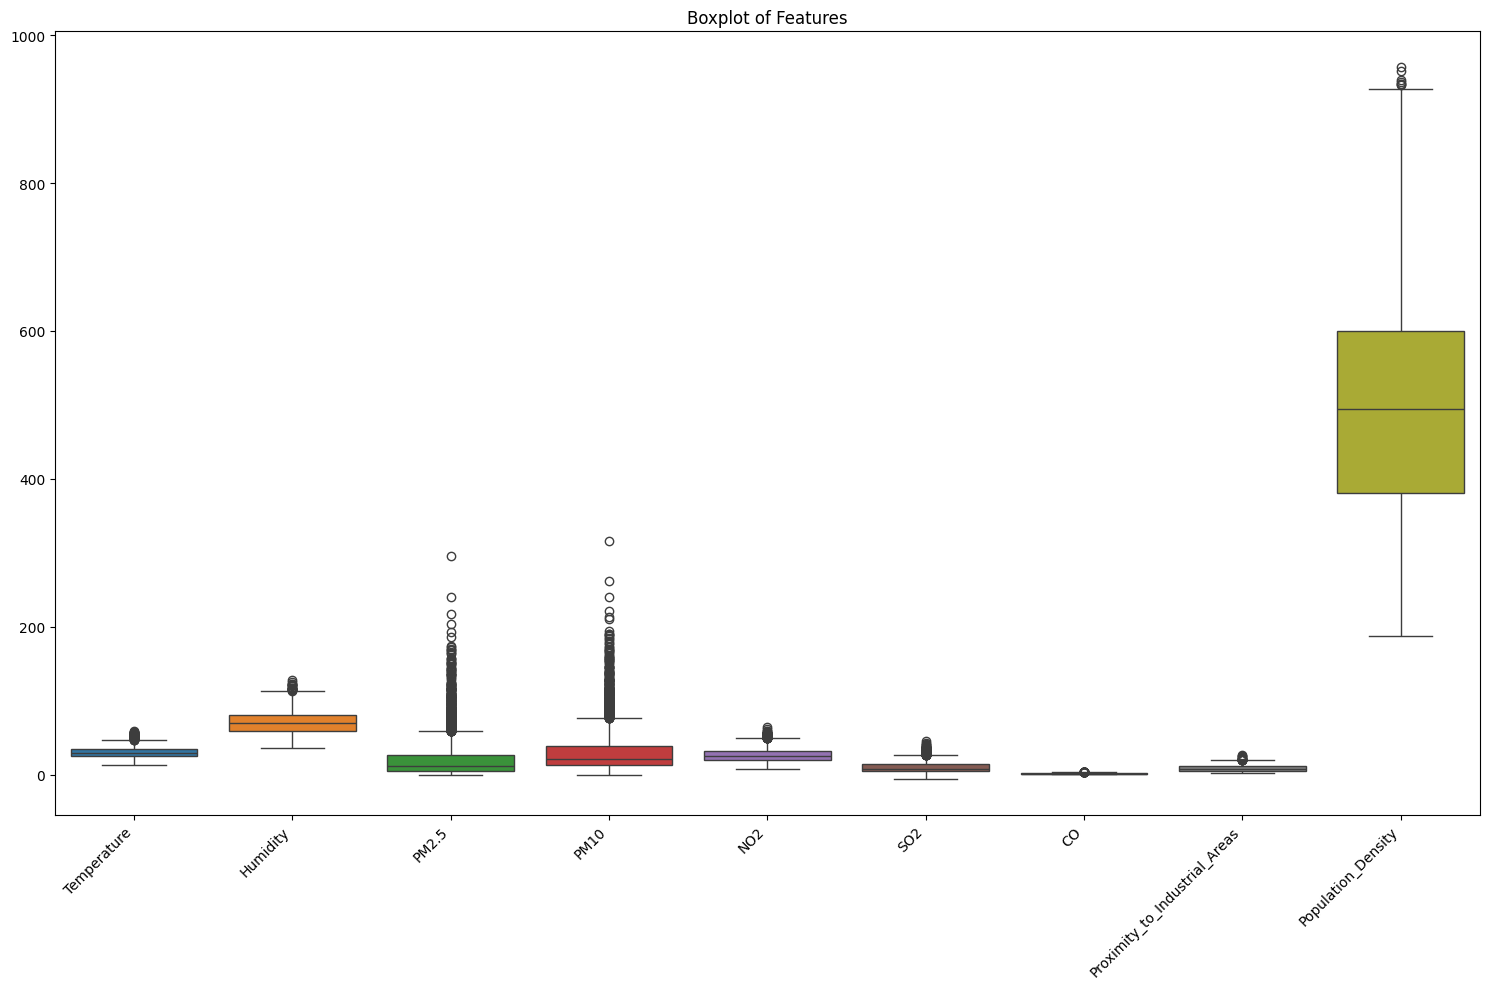

In [ ]:
# prompt: create a boxplot for all columns

import matplotlib.pyplot as plt
# Visualize distributions of features using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop('Air_Quality', axis=1)) # Exclude the target variable if it's categorical
plt.title('Boxplot of Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_cleaned

# Remove outliers for PM2.5 and PM10
df = remove_outliers_iqr(df.copy(), 'PM2.5')
df = remove_outliers_iqr(df.copy(), 'PM10')

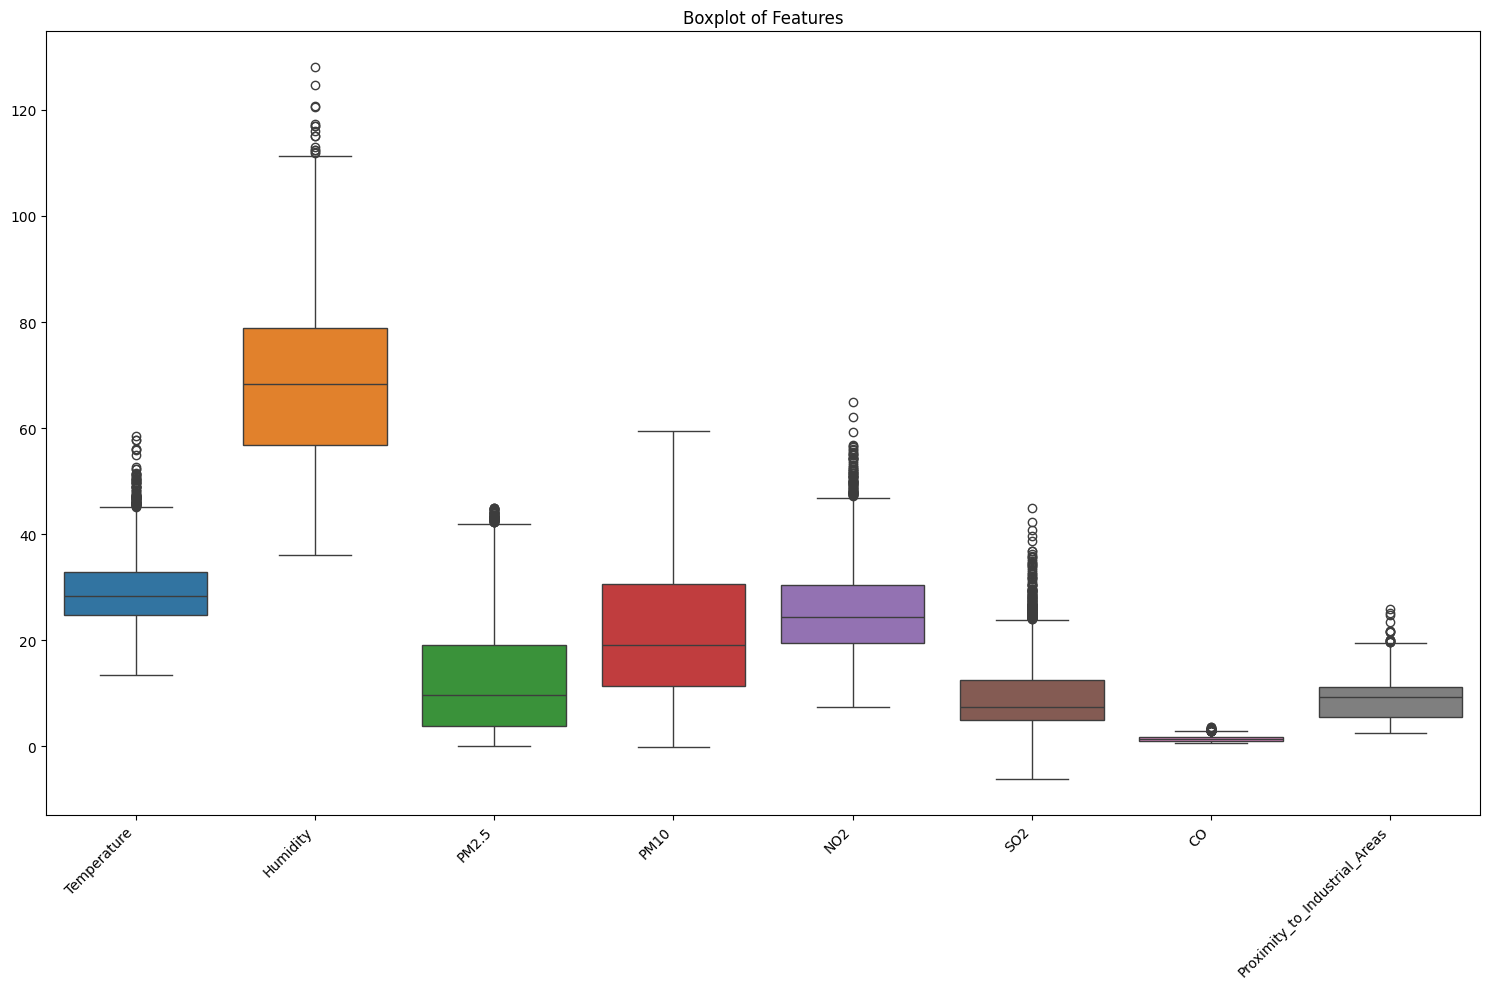

In [ ]:
# prompt: create a boxplot for all columns

import matplotlib.pyplot as plt
# Visualize distributions of features using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(['Air_Quality','Population_Density'], axis=1)) # Exclude the target variable if it's categorical
plt.title('Boxplot of Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

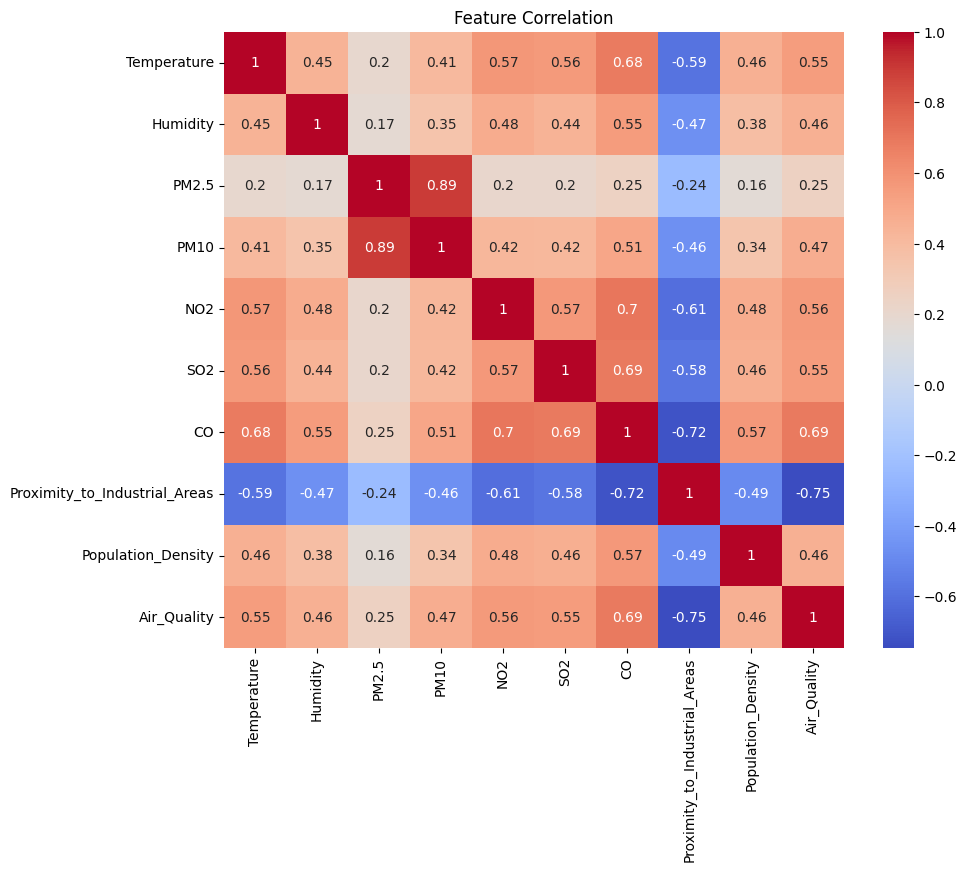

In [ ]:
### Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [ ]:
# Features and labels
X = df.drop('Air_Quality', axis=1)
y = df['Air_Quality']

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3.Logistic Regression

In [ ]:



from sklearn.linear_model import LogisticRegression

# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10]}
lr_model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Evaluation
print("\n Logistic Regression")
print("Best Parameters:", lr_model.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


 Logistic Regression
Best Parameters: {'C': 10}
Accuracy: 0.932648401826484
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       0.81      0.75      0.78        80
           2       0.94      0.97      0.95       272
           3       0.80      0.80      0.80       148

    accuracy                           0.93       876
   macro avg       0.89      0.88      0.88       876
weighted avg       0.93      0.93      0.93       876



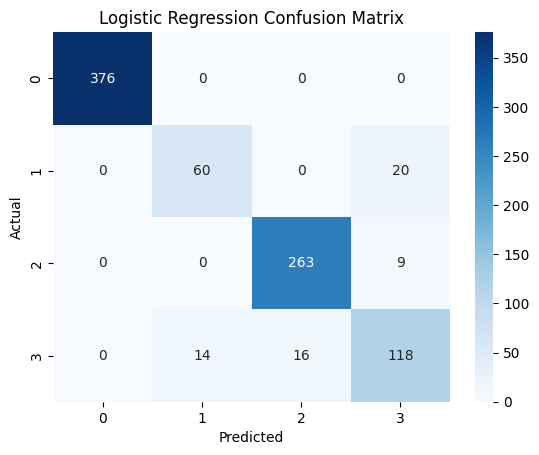

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4.Random Forest Classifier

In [ ]:


from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("\n Random Forest")
print("Best Parameters:", rf_model.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


 Random Forest
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.9474885844748858
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       0.89      0.72      0.80        80
           2       0.97      0.97      0.97       272
           3       0.82      0.90      0.86       148

    accuracy                           0.95       876
   macro avg       0.92      0.90      0.91       876
weighted avg       0.95      0.95      0.95       876



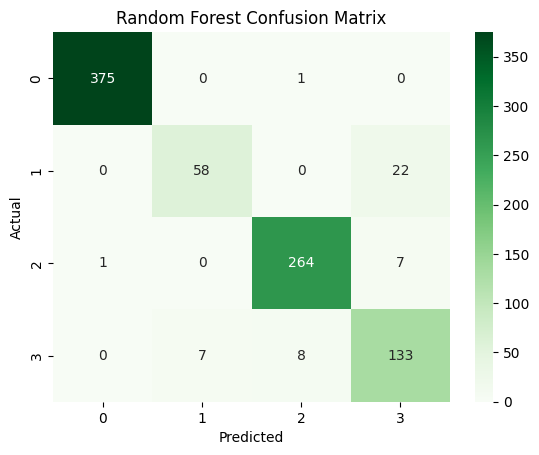

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

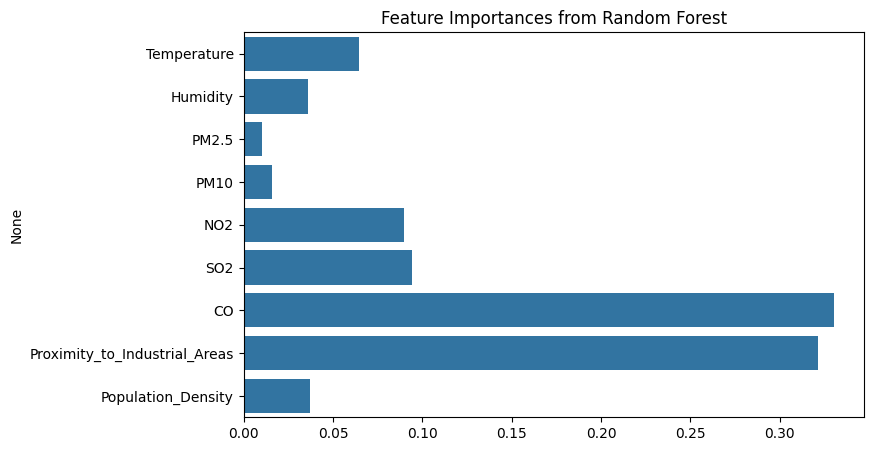

In [ ]:
# Feature Importance
importances = rf_model.best_estimator_.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances from Random Forest")
plt.show()

#  1.Decision Tree Classifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
dt_model = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
print("\n Decision Tree")
print("Best Parameters:", dt_model.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


 Decision Tree
Best Parameters: {'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.932648401826484
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       0.89      0.74      0.81        80
           2       0.96      0.93      0.94       272
           3       0.77      0.89      0.82       148

    accuracy                           0.93       876
   macro avg       0.90      0.89      0.89       876
weighted avg       0.94      0.93      0.93       876



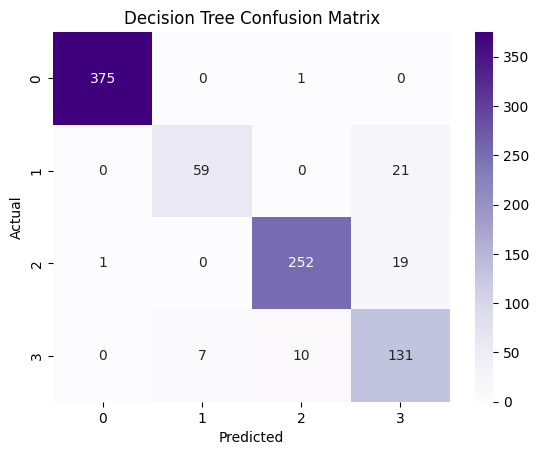

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Purples')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Plot tree
plt.figure(figsize=(150, 150))
plot_tree(dt_model.best_estimator_, filled=True, feature_names=X.columns, class_names=le.classes_)
plt.title("Decision Tree Structure")
plt.show()


# 2.K-Nearest Neighbors

In [ ]:


from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
print("\nKNN")
print("Best Parameters:", knn_model.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN
Best Parameters: {'n_neighbors': 9}
Accuracy: 0.9178082191780822
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       376
           1       0.90      0.56      0.69        80
           2       0.92      0.97      0.94       272
           3       0.77      0.81      0.79       148

    accuracy                           0.92       876
   macro avg       0.89      0.84      0.85       876
weighted avg       0.92      0.92      0.91       876



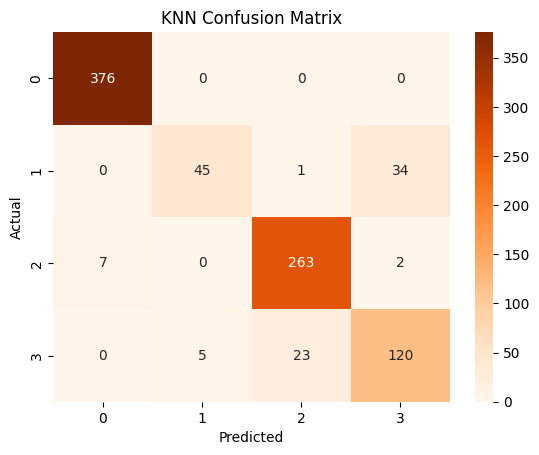

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3.Model Comparison

In [ ]:


# Collect and compare model results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn)
    ]
})

print("\n Final Model Comparison:")
print(results.sort_values(by='Accuracy', ascending=False))


 Final Model Comparison:
                 Model  Accuracy
2        Random Forest  0.947489
0  Logistic Regression  0.932648
1        Decision Tree  0.932648
3                  KNN  0.917808


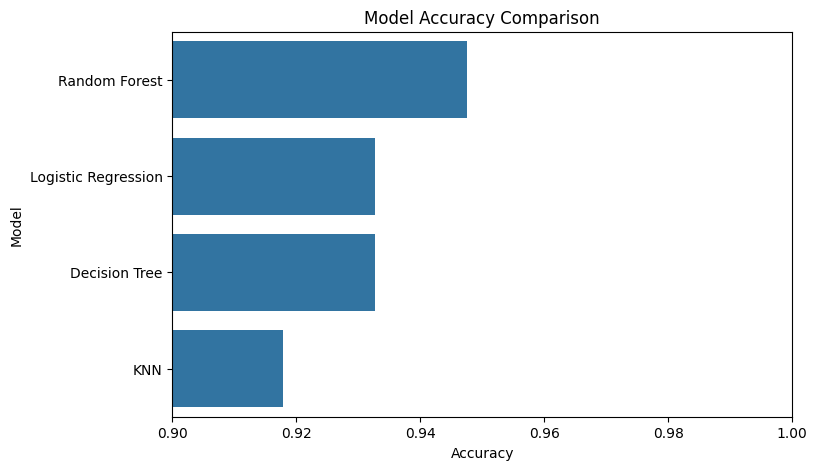

In [ ]:
# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=results.sort_values(by='Accuracy', ascending=False))
plt.title("Model Accuracy Comparison")
plt.xlim(0.9, 1.0)  # Set x-axis to start from 0.9
plt.show()


# 4.Prediction

In [ ]:
#  SECTION 8: Make Prediction Using Random Forest Model

# Example input (update with actual values as needed)
sample_input = {
    'Temperature': 30,
    'Humidity': 65,
    'PM2.5': 80,
    'PM10': 110,
    'NO2': 50,
    'SO2': 20,
    'CO': 1.1,
    'Proximity_to_Industrial_Areas': 2,
    'Population_Density': 1500
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_input])

# Scale the input using the same scaler
sample_scaled = scaler.transform(sample_df)

# Predict using the trained Random Forest model
predicted_class = rf_model.predict(sample_scaled)[0]

# Decode the prediction back to label
predicted_label = le.inverse_transform([predicted_class])[0]

print("\nPredicted Air Quality for the given input:", predicted_label)



Predicted Air Quality for the given input: Poor


In [ ]:
#  SECTION 8: Make Prediction Using Random Forest Model

# Example input (update with actual values as needed)
sample_input = {
    'Temperature': 30,
    'Humidity': 65,
    'PM2.5': 60,
    'PM10': 50,
    'NO2': 20,
    'SO2': 10,
    'CO': 0.9,
    'Proximity_to_Industrial_Areas': 6,
    'Population_Density': 1500
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_input])

# Scale the input using the same scaler
sample_scaled = scaler.transform(sample_df)

# Predict using the trained Random Forest model
predicted_class = rf_model.predict(sample_scaled)[0]

# Decode the prediction back to label
predicted_label = le.inverse_transform([predicted_class])[0]

print("\nPredicted Air Quality for the given input:", predicted_label)



Predicted Air Quality for the given input: Moderate


In [ ]:
#  SECTION 8: Make Prediction Using Random Forest Model

# Example input (update with actual values as needed)
sample_input = {
    'Temperature': 30,
    'Humidity': 65,
    'PM2.5': 20,
    'PM10': 20,
    'NO2': 30,
    'SO2': 10,
    'CO': 0.8,
    'Proximity_to_Industrial_Areas': 11,
    'Population_Density': 1500
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_input])

# Scale the input using the same scaler
sample_scaled = scaler.transform(sample_df)

# Predict using the trained Random Forest model
predicted_class = rf_model.predict(sample_scaled)[0]

# Decode the prediction back to label
predicted_label = le.inverse_transform([predicted_class])[0]

print("\nPredicted Air Quality for the given input:", predicted_label)



Predicted Air Quality for the given input: Good
